<h2><center><code>HR-Snow & Ice products monitoring - Demo </code></center></h2>
<h3><center><code> Satellite data for monitoring ice cover lakes in Poland </code></center></h3>

This notebook presents a use case of the Copernicus Pan European HR-S&I products: **identify ice occurences on lakes**. 

*Target products*
- Aggregated River and Lake Ice Extent (ARLIE)

ARLIE is computed for all EU-Hydro river basins and is a spatial aggregation of River and Lake Ice Extent (RLIE) products providing the percentage of class cover (open water,snow-free/snow-covered ice) over individual lakes and within 10 km longitudinal sections of rivers. Find more details in the<a href="https://land.copernicus.eu/pan-european/biophysical-parameters/high-resolution-snow-and-ice-monitoring/ice-products/aggregated-river-and-lake-ice-extent" target="_blank"> Product User Manual (PUM)</a>.

**ARLIE product is hosted on a database, which is accessible through a specific API** and does not require registration, while other HR-S&I products can be visualised, searched and downloaded through different solutions. 
This API provides 2 procedures (RPC) that can be called in order to get the information needed:
- The first procedure is used to retrieve the aggregated ice information on a specific area and time interval :  https://cryo.land.copernicus.eu/arlie/get_arlie
- The second one is to retrieve the geometries (river sections and lakes): https://cryo.land.copernicus.eu/arlie/get_geometries 

<a href="https://cryo.land.magellium.fr/get_arlie?geometrywkt=POINT(21.719406798130574+53.75452788341801)&cloudcoveragemax=100&startdate=2017-12-01&completiondate=2022-03-30" target="_blank">      >>> EXAMPLE of request URL</a> 

A <a href="https://github.com/eea/clms-hrsi-api-client-python-arlie" target="_blank">Python client</a> has been developed to facilitate the use of the URLs described above and make the retrieval of ARLIE easier. **The present notebook relies on this Python script**.

Contact point: <a href="https://land.copernicus.eu/contact-form" target="_blank">Copernicus Land Monitoring Service (CLMS) desk</a>. \
*Contributors: <a href="https://earthobservation.magellium.com/?lang=en">Magellium</a>.*
**********

### Prerequisites
- Download the <a href="https://github.com/eea/clms-hrsi-api-client-python-arlie" target="_blank">Python client</a> and store it in the same folder as this Jupyter notebook.

### Load modules 

*Main packages*
- <code>pandas</code> library for array data manipulation
- <code>matplotlib.pyplot</code> library for visualisation 

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

### Define your area of interest (AOI)
...using the HR-S&I <a href="https://cryo.land.copernicus.eu/finder/" target="_blank">Cryo finder</a> (no registration required). Use the "Polygon selection" tool to define your AOI.

<figure><img src='images/finder_geometry.png' alt='Polygon selection on the Finder' align='center' width='100%'>
</figure>
</div> 

Search for results, and you will find the request url.

<div style='text-align:center;'>
<figure><img src='images/finder_search.png' alt='Search for results on the Finder to retrieve the request url' align='center' width='100%'>
</figure>
</div> 

I copied this url below. 
https://cryo.land.copernicus.eu/resto/api/collections/HRSI/search.json?maxRecords=10&sortParam=startDate&sortOrder=descending&status=all&<span style="color:black">*geometry=POLYGON((
    <span style="color:blue">21.288692013495375+53.92527048031204</span><span style="color:green">%2C21.516571748567397+53.63254426728619</span><span style="color:orange">%2C22.051593735258237+53.59727981858464</span>
            <span style="color:red">%2C21.922792145869703+53.890251099775924</span>
                <span style="color:blue">%2C21.288692013495375+53.92527048031204))*</span>.&dataset=ESA-DATASET

The argument "geometry" defines your area of interest in the appropriate format. 

*NB: you can also build your polygon through QGIS software based on the <a href="https://land.copernicus.eu/user-corner/technical-library/aggregated-river-and-lake-ice-extent-s1-s2-usage-manual" target="_blank">tutorial available on the CLMS portal</a>. It will result in a WKT geometry that you can adapt for ARLIE retrieval (adding '+' and '%2C').*

### Download ice statistics (ARLIE) on lakes and river sections in your AOI

In [8]:
from clms_hrsi_arlie_downloader import download_arlie_products

# below are the different arguments of the download_arlie_products function.
myAOI='POLYGON((21.288692013495375+53.92527048031204%2C21.516571748567397+53.63254426728619%2C22.051593735258237+53.59727981858464%2C21.922792145869703+53.890251099775924%2C21.288692013495375+53.92527048031204))'
geometryWkt = myAOI

outputDir = "./output_folder"
startDate = '2017-12-01'
completionDate = '2022-03-30'
cloudCoverageMax = 100
requestGeometries = True #if False, it will only return the ARLIE statistics.
returnMode = 'csv_and_variable' #three options: "csv", "csv_and_variable", "variable"

In [9]:
# I do retrieve both the geometries and the ARLIE statistics
geom, arlie = download_arlie_products(returnMode, outputDir=outputDir, startDate=startDate, completionDate=completionDate, geometryWkt=geometryWkt, cloudCoverageMax=cloudCoverageMax, requestGeometries=requestGeometries)

Getting number of geometries
Executing request for geometries: https://cryo.land.copernicus.eu/arlie/get_geometries?geometrywkt=POLYGON((21.288692013495375+53.92527048031204%2C21.516571748567397+53.63254426728619%2C22.051593735258237+53.59727981858464%2C21.922792145869703+53.890251099775924%2C21.288692013495375+53.92527048031204))
Writing geometries in /home/jovyan/JupyterNB/DemoARLIE/output_folder/geometries.csv
Executing request for ARLIE: https://cryo.land.copernicus.eu/arlie/get_arlie?geometrywkt=POLYGON((21.288692013495375+53.92527048031204%2C21.516571748567397+53.63254426728619%2C22.051593735258237+53.59727981858464%2C21.922792145869703+53.890251099775924%2C21.288692013495375+53.92527048031204))&cloudcoveragemax=100&startdate=2017-12-01&completiondate=2022-03-30
Writing ARLIE in /home/jovyan/JupyterNB/DemoARLIE/output_folder/arlie.csv
Found 87842 ARLIE products.
Writing metadata link into /home/jovyan/JupyterNB/DemoARLIE/output_folder/ARLIE_MTD.xml
End.


Two csv files were downloaded: 'arlie.csv' and 'geometries.csv'.

### Manipulate the statistics and geometries csv files with Python

In [10]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')

# read ice statistics
arlie = pd.read_csv(os.path.join(outputDir, 'arlie.csv'), parse_dates=['datetime'], date_parser=dateparse, delimiter=";")
arlie = arlie.sort_values(by="datetime", ascending=True)
display(arlie)

,id,river_km_id,datetime,water_perc,ice_perc,other_perc,cloud_perc,nd_perc,qc,source
0,1,342314,2017-12-01 16:27:05,91,4,0,0,5,2,Sentinel-1 Sentinel-2
21,22,342410,2017-12-01 16:27:05,75,10,0,0,15,2,Sentinel-1 Sentinel-2
22,23,342430,2017-12-01 16:27:05,89,6,0,0,5,2,Sentinel-1 Sentinel-2
23,24,342433,2017-12-01 16:27:05,83,10,0,0,7,2,Sentinel-1 Sentinel-2
24,25,342464,2017-12-01 16:27:05,86,6,0,0,8,2,Sentinel-1 Sentinel-2
...,...,...,...,...,...,...,...,...,...,...
79295,79296,339888,2022-03-28 16:28:32,89,0,6,0,5,0,Sentinel-1 Sentinel-2
79294,79295,339810,2022-03-28 16:28:32,71,0,15,0,14,0,Sentinel-1 Sentinel-2
79293,79294,339706,2022-03-28 16:28:32,84,0,9,0,7,0,Sentinel-1 Sentinel-2
79313,79314,342205,2022-03-28 16:28:32,87,0,3,0,10,0,Sentinel-1 Sentinel-2


In [11]:
# read the geometries 
geometries = pd.read_csv(os.path.join(outputDir, 'geometries.csv'), delimiter=";")

# identify the two largest lakes of the region
biggest_lakes = geometries.nlargest(2, "area")
biggest_lakes_id = biggest_lakes.id.values
display(biggest_lakes)

,id,geometry,basin_name,eu_hydro_id,object_nam,area,river_km
9,343099,"MULTIPOLYGON(((5093833.4295 3462455.9311,50935...",Vistula,IW37005303,Jezioro Sniardwy,99346677.1,0
8,343075,"MULTIPOLYGON(((5101731.0249 3462283.4637,51017...",Vistula,IW37005279,Jezioro Ros,16635878.7,0


"river_km_id" of the ARLIE table refers to the "Id" of the geometry

Hydro element Jezioro Ros, id: 343075 

Hydro element Jezioro Sniardwy, id: 343099 



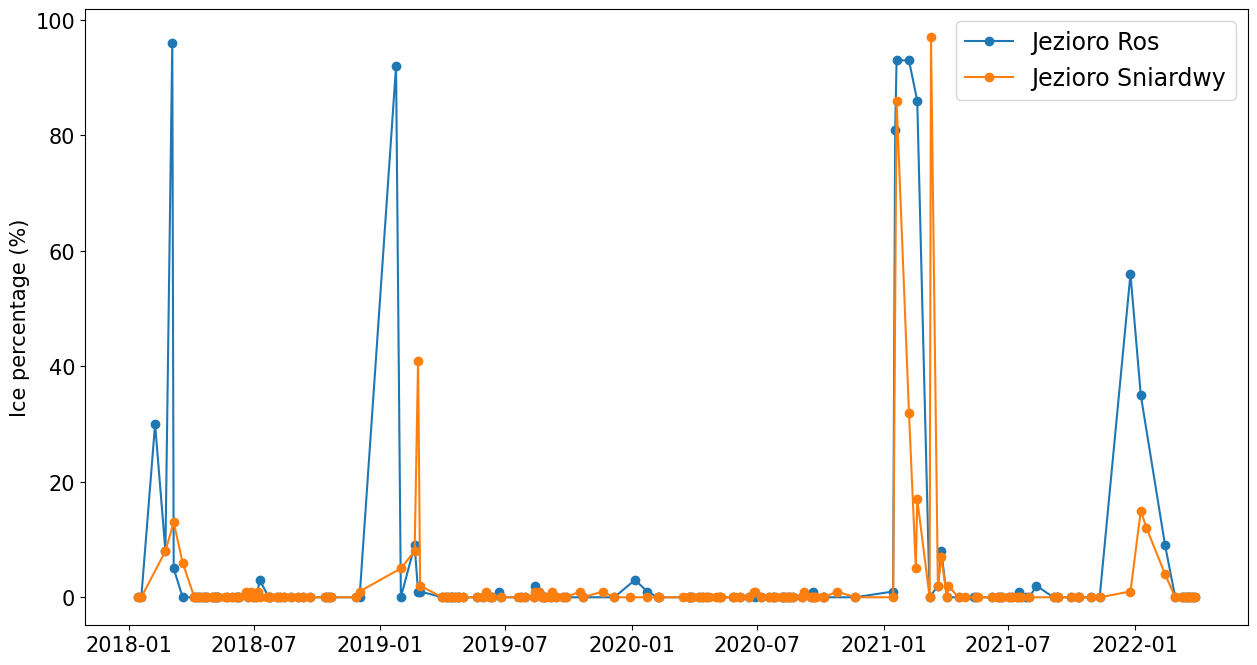

In [12]:
# Retrieve ARLIE statistics on those two lakes

fig, ax=plt.subplots(1, 1, figsize=(15, 8))
plt.rcParams.update({'font.size':15}); plt.rcParams.update({'legend.fontsize':17})

# Group ARLIE stats by river_id (= section ID)
sorted_arlie = arlie.groupby('river_km_id')

for section_id, frame in sorted_arlie:
    
    # Find ARLIE stats on the lakes I am looking for
    if section_id in biggest_lakes_id:

        # Get the name and ID of the lakesa I am looking for
        geom_name = geometries.where(geometries.id == section_id).dropna().object_nam.values[0]
        print("Hydro element %s, id: %d \n"%(geom_name, section_id))
        
        # Only get ARLIE stats with high confidence (i.e. QC flag = 0)
        frame = frame.where(frame.qc == 0).dropna()
        
        #  Plot the ice data over the time period I requested
        plt.plot_date(frame.datetime.values, frame.ice_perc.values, ls='-', label=geom_name)

ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12))
plt.ylabel('Ice percentage (%)')
plt.legend();


### Similar manipulations with QGIS

Two csv files were downloaded: 'arlie.csv' and 'geometries.csv'. Both can be open in QGIS following the <a href="https://land.copernicus.eu/user-corner/technical-library/aggregated-river-and-lake-ice-extent-s1-s2-usage-manual" target="_blank">tutorial available on the CLMS portal</a>. 

<div style='text-align:center;'>
<figure><img src='images/QGIS_geometries_and_arlie_table.png' alt='Display the river sections and lakes geometries and the ARLIE table in QGIS' align='center' width='100%'>
</figure>
</div>

Once the geometries have been imported into QGIS, it is possible to request the largest lakes in the AOI. I open the Database Manager
<div style='text-align:center;'>
<figure><img src='images/QGIS_database_manager.png' alt='make SQL requests in QGIS' align='center' width='90%'>
</figure>
</div>

And I apply the following SQL command:

<code>SELECT id, object_nam, area from geometries ORDER BY area DESC</code>

<div style='text-align:center;'>
<figure><img src='images/QGIS_geometries.png' alt='largest geometries in QGIS' align='center' width='70%'>
</figure>
</div>

Then we can extract the ice percentage relative to the Sniardwy Lake with the following SQL command:

<code>select datetime, ice_perc from arlie
join geometries on arlie.river_km_id = geometries.id
where arlie.river_km_id = 343099</code>

Then the ice percentage can be stored in a specific layer:

<div style='text-align:center;'>
<figure><img src='images/QGIS_sniardwy_ice_perc.png' alt='sniardwy_ice_perc_QGIS' align='center' width='80%'>
</figure>
</div>

This new layer can be saved and further used in Python, Excel, or manipulated in QGIS for the most experts. 




### Going further and focus on January 2021 episode in this area

The River and Lake Ice Extent product can be visualised through <a href="https://wekeo.eu/data/" target="_blank">WEkEO</a>, or searched and downloaded through the HR-S&I <a href="https://cryo.land.copernicus.eu/finder/" target="_blank">Cryo finder</a>
<div style='text-align:center;'>
<figure><img src='images/WEKEO_rlie_product_20210119.png' alt='rlie_product_wekeo_20210119' align='center' width='90%'>
</figure>
</div> 